# 롤 챔피언 능력치 분석

1. 기본공격력이 높은 챔피언 상위10개 (stats.attackdamage)
2. 기본체력이 높은 챔피언 상위10개 (stats.hp)
3. 기본 방어력이 높은 챔피언 상위10개 (stats.armor)
4. 이속이 빠른 챔피언 상위10개 (stats.movespeed)
5. 공격속도가 빠른 챔피언 상위10개 (stats.attackspeed)
6. 시각화 후 결론 내기


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. 데이터 전처리 과정

In [2]:
#데이터 불러오기
data = pd.read_csv("./data/riot_champion.csv")
data.head(5)

,Unnamed: 0,version,id,key,name,title,blurb,tags,partype,info.attack,...,stats.hpregen,stats.hpregenperlevel,stats.mpregen,stats.mpregenperlevel,stats.crit,stats.critperlevel,stats.attackdamage,stats.attackdamageperlevel,stats.attackspeedperlevel,stats.attackspeed
0,0,10.6.1,Aatrox,266,Aatrox,the Darkin Blade,Once honored defenders of Shurima against the ...,"['Fighter', 'Tank']",Blood Well,8,...,3.0,1.00,0.000,0.000,0,0,60.00,5.00,2.500,0.651
1,0,10.6.1,Ahri,103,Ahri,the Nine-Tailed Fox,Innately connected to the latent power of Rune...,"['Mage', 'Assassin']",Mana,3,...,6.5,0.60,8.000,0.800,0,0,53.04,3.00,2.000,0.668
2,0,10.6.1,Akali,84,Akali,the Rogue Assassin,Abandoning the Kinkou Order and her title of t...,['Assassin'],Energy,5,...,8.0,0.50,50.000,0.000,0,0,62.40,3.30,3.200,0.625
3,0,10.6.1,Alistar,12,Alistar,the Minotaur,Always a mighty warrior with a fearsome reputa...,"['Tank', 'Support']",Mana,6,...,8.5,0.85,8.500,0.800,0,0,62.00,3.75,2.125,0.625
4,0,10.6.1,Amumu,32,Amumu,the Sad Mummy,Legend claims that Amumu is a lonely and melan...,"['Tank', 'Mage']",Mana,2,...,9.0,0.85,7.382,0.525,0,0,53.38,3.80,2.180,0.736


In [3]:
# 필요한것 만 추출(name, stats.attackdamage, stats.hp, stats.armor, stats.movespeed, stats.attackspeed)
df= data[["name", "stats.attackdamage", "stats.hp", "stats.armor", "stats.movespeed", "stats.attackspeed"]]
df.head(10)

,name,stats.attackdamage,stats.hp,stats.armor,stats.movespeed,stats.attackspeed
0,Aatrox,60.000,580.00,38.00,345,0.651
1,Ahri,53.040,526.00,20.88,330,0.668
2,Akali,62.400,575.00,23.00,345,0.625
3,Alistar,62.000,600.00,44.00,330,0.625
4,Amumu,53.380,613.12,33.00,335,0.736
5,Anivia,51.376,480.00,21.22,325,0.625
6,Annie,50.410,524.00,19.22,335,0.579
7,Aphelios,57.000,500.00,28.00,325,0.640
8,Ashe,61.000,539.00,26.00,325,0.658
9,Aurelion Sol,57.000,575.00,19.00,325,0.625


In [4]:
#결측값 확인하기 없으면 Pass
df.isnull().sum()

name                  0
stats.attackdamage    0
stats.hp              0
stats.armor           0
stats.movespeed       0
stats.attackspeed     0
dtype: int64

In [5]:
#기본공격력, 체력,방어력은 소수점 제거하기
df1 = df[["stats.attackdamage", "stats.hp", "stats.armor"]].round(0).astype(int)
df1
df[["stats.attackdamage", "stats.hp", "stats.armor"]] = df1
df.head(10)

C:\Users\chahn\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,name,stats.attackdamage,stats.hp,stats.armor,stats.movespeed,stats.attackspeed
0,Aatrox,60,580,38,345,0.651
1,Ahri,53,526,21,330,0.668
2,Akali,62,575,23,345,0.625
3,Alistar,62,600,44,330,0.625
4,Amumu,53,613,33,335,0.736
5,Anivia,51,480,21,325,0.625
6,Annie,50,524,19,335,0.579
7,Aphelios,57,500,28,325,0.640
8,Ashe,61,539,26,325,0.658
9,Aurelion Sol,57,575,19,325,0.625


## 2. 데이터 분석하기

In [14]:
#기본공격력이 높은 케릭터 상위10개
attack = df.sort_values("stats.attackdamage",ascending=False).drop(["stats.hp", "stats.armor", "stats.movespeed", "stats.attackspeed"], axis=1).head(10)
attack

,name,stats.attackdamage
62,Lee Sin,70
94,Renekton,69
49,Kalista,69
85,Ornn,69
122,Tryndamere,69
18,Cho'Gath,69
16,Camille,68
55,Kayn,68
95,Rengar,68
44,Jax,68


In [15]:
#기본체력이 높은 케릭터 상위10개
hp = df.sort_values("stats.hp",ascending=False).drop(["stats.attackdamage", "stats.armor", "stats.movespeed", "stats.attackspeed"], axis=1).head(10)
hp

,name,stats.hp
122,Tryndamere,626
33,Garen,620
121,Trundle,616
142,Zac,615
4,Amumu,613
53,Katarina,602
108,Skarner,601
114,Tahm Kench,600
88,Pyke,600
35,Gragas,600


In [16]:
#기본방어력이 높은 케릭터 상위10개
armor = df.sort_values("stats.armor",ascending=False).drop(["stats.attackdamage", "stats.hp", "stats.movespeed", "stats.attackspeed"], axis=1).head(10)
armor

,name,stats.armor
114,Tahm Kench,47
63,Leona,47
14,Braum,47
88,Pyke,45
3,Alistar,44
117,Taric,40
86,Pantheon,40
20,Darius,39
78,Nautilus,39
140,Yorick,39


In [17]:
#이동속도가 빠른 케릭터 상위10개
m_speed = df.sort_values("stats.movespeed",ascending=False).drop(["stats.attackdamage", "stats.hp", "stats.armor", "stats.attackspeed"], axis=1).head(10)
m_speed

,name,stats.movespeed
86,Pantheon,355
71,Master Yi,355
102,Shaco,350
44,Jax,350
121,Trundle,350
77,Nasus,350
83,Olaf,350
57,Kha'Zix,350
104,Shyvana,350
73,Wukong,345


In [ ]:
#공격속도가 빠른 케릭터 상위10개
a_speed = df.sort_values("stats.attackspeed",ascending=False).drop(["stats.attackdamage", "stats.hp", "stats.armor", "stats.movespeed"], axis=1).head(10)
a_speed

## 3. 시각화

1. 기본공격력을 기준으로 기본체력, 방어력, 공격속도, 이동속도 분포 조사하기

Text(0, 0.5, 'Movespeed')

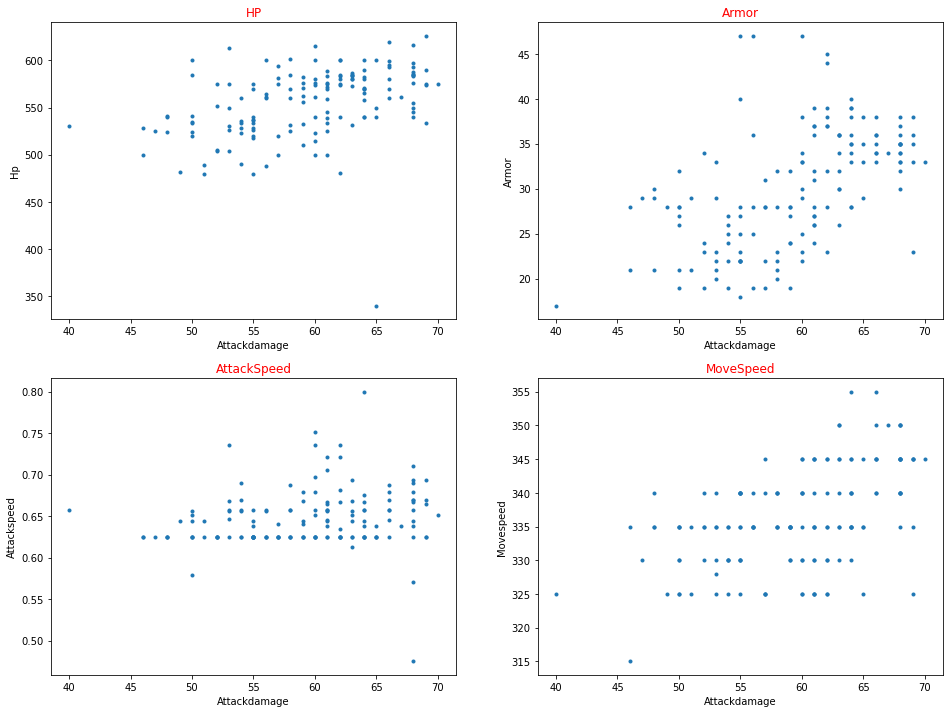

In [53]:
#시각
plt.figure(figsize=(16,12))

plt.subplot(221)
plt.scatter(data=df, x="stats.attackdamage", y="stats.hp", marker='.')
plt.title("HP", color="r")
plt.xlabel("Attackdamage")
plt.ylabel("Hp")

plt.subplot(222)
plt.scatter(data=df, x="stats.attackdamage", y="stats.armor", marker='.')
plt.title("Armor", color="r")
plt.xlabel("Attackdamage")
plt.ylabel("Armor")

plt.subplot(223)
plt.scatter(data=df, x="stats.attackdamage", y="stats.attackspeed", marker='.')
plt.title("AttackSpeed", color="r")
plt.xlabel("Attackdamage")
plt.ylabel("Attackspeed")

plt.subplot(224)
plt.scatter(data=df, x="stats.attackdamage", y="stats.movespeed", marker='.')
plt.title("MoveSpeed", color="r")
plt.xlabel("Attackdamage")
plt.ylabel("Movespeed")

## 결론

1. 대부분에 챔파언은 체력이 450이상이며 공격력이 높은 챔피언일수록 체력이 높다.
2. 방어력은 골고루 분포 되어 있음.
3. 대부분에 챔파언은 공격속도가 0.625를 넘음.
4. 이동속도는 일정한 규칙으로 분포되어 있음.

### 예정

1. 아이템 분석하기
- 유저들이 가장 많이 사용한 아이템 상위10개(인기 아이템)
- 유저들이 가장 적게 사용한 아이템 상위10개(비인기 아이템)